# PREVISÃO DE PERDA DE CLIENTES

Melhorar a satisfação dos clientes é imprescindível para os orgãos que buscam ampliar seus negócios, sem que haja uma dependência de investimentos de alto custo para reter novos usuários. Três pilares tem que trabalhar de forma conjunta e eficaz, os departamêntos de: Marketing, vendas e conservação de clientes, para que essa ação garanta clientes contentes, fornecendo incentivos e aprensentando ofertas no momento certo. Dessa forma diminuindo a rotatividade dos clientes em relação ao banco.

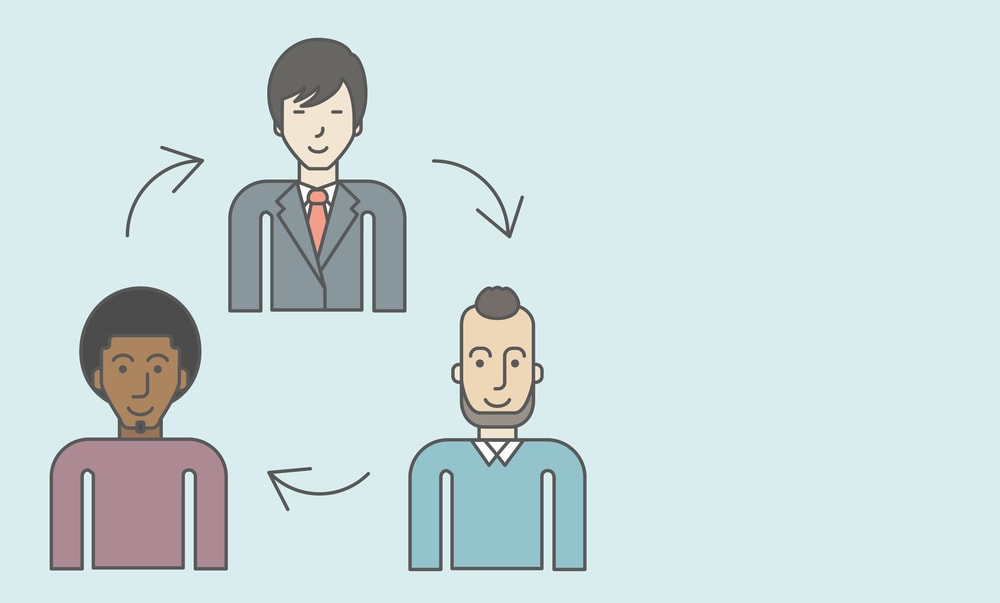

* ## Mas o que leva essa alta rotatividade de clientes?

Quando seus clientes estão insatisfeitos com o serviço que estão obtendo de sua empresa, eles levarão o dinheiro para outro lugar. Se houver um tema subjacente que explica por que está ocorrendo a rotatividade de clientes, você vai querer investigar as razões, bem como o que pode fazer para reduzir a rotatividade.

* ## Como prever essa rotatividade?

Vamos criar algoritimos de Machine Learning para prever a rotatividade de clientes do banco em torno de 6 meses e vamos calcular métricas para avaliar a performance de cada modelo.

* Utilizaremos 5 modelos: Random Forest, Adaboost e Gradient Boosting.

* As métricas utilizadas Acurácia, Curva ROC.

## A construção do modelo preditivo seguirá um processo geral com as fases abaixo:

* **Obtenção dos dados**

* **Exploração dos dados**
  *  Explorar as características dos dados;

  * Explorar os dados estatisticamente;

 * Identificar valores ausentes;

 * Identificar se há desbalanceamento de classe;

  * Explorar os dados visualmente;

  * Identificar ruídos nos dados(outliers);

  * Estudar as distribuições dos atributos;

  * Estudar possíveis correlações entre os atributos

* **Engenharia de características**

  * Fixar ou remover ruídos;

  * Engenharia de atributos;

  * Seleção de características(atributos);

  * Preencher valores ausentes(com média, zero...) ou removê-los.
  * Redução da dimensionalidade

* **Modelação**
  * Treinar uma variedade de classificadores: como nosso problema é de natureza supervisionada, os algoritmos usados deverão atender essa característica;

  * Medir e comparar as performances;

  * Selecionar o melhor modelo;


* **Explicação**

In [94]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### BIBLIOTECA

In [95]:
import numpy as np
import pandas as pd
#______________________________________________________________
from datetime import datetime

#______________________________________________________________
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

#______________________________________________________________
#necessário para plotar com plotly diretamente do dataframe
import cufflinks as cf
cf.go_offline()

#Classes utilitárias
from helper import *
#from PipelineBuilder import *
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
path = "plots/"

## 1. IMPORTAÇÃO DOS DADOS

In [96]:
df = pd.read_csv('Churn_Modelling.csv')

## 2. EXPLORAÇÃO DOS DADOS

In [97]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.1 Descrição dos dados

In [98]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Explicação**

Verificando abaixo o resumo estatístico, por meio do método describe(). Podemos avaliar que as variáveis não tem nenhuma discrepância aparante.

## 2.2 Contagem de valores únicos

In [99]:
print("n\Contar valores únicos:")
print(df.nunique())

n\Contar valores únicos:
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


**Explicação**

Agora conseguimos visualizar que o conjunto de dados possui seis variáveis categóricas e que precisam ser trabalhadas posteriomente.

In [100]:
## Excluindo features
df = df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'])

## 2.3 Verificação de valores ausentes

In [101]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(10)

,Total,Percent
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


**Explicação:**

Em relação a qualidade do conjunto de dados, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza.

## 2.4 DESBALANCEAMENTO DE CLASSE

0    7963
1    2037
Name: Exited, dtype: int64

Rotatividade representam 20.3700% do dataset.



[]

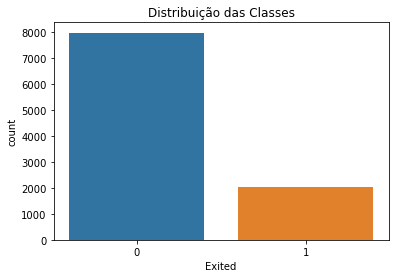

In [102]:
# ver o balanceamento das classes
print(df.Exited.value_counts())
print("\nRotatividade representam {:.4f}% do dataset.\n".format((df[df.Exited == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Exited', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

**Explicação**

* A rotatividade de clientes durante os 6 meses anteriores correspondem ao total de 20.37%.
* O gráfico de barras mostra como essa discrepância se torna nítida e visível.
* Esse problema interfere de forma significativa na peformance do modelo e será necessário utilizar técnicas de balanceamento como por exemplo: RandomUndersampler.

## 2.4 Visualização gráfica

In [103]:
def draw_bar_plot_vert(col_name, df):    
    tempAll = df[col_name].value_counts()
    temp1 = df[df["Exited"] == 1][col_name].value_counts()
    temp0 = df[df["Exited"] == 0][col_name].value_counts()
    
    trace0 = go.Bar(x=tempAll.index, y=(tempAll / tempAll.sum())*100, name='All', marker=dict(color="#49b675"))
    trace1 = go.Bar(x=temp1.index, y=(temp1 / temp1.sum())*100, name='Exited = 1', marker=dict(color="#e61919"))
    trace2 = go.Bar(x=temp0.index, y=(temp0 / temp0.sum())*100, name='Exited = 0', marker=dict(color="#87cefa"))
    return trace0, trace1, trace2 

### 2.4.1 Sexo do cliente

In [104]:
trace0, trace1, trace2 =  draw_bar_plot_vert("Gender", df)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]], print_grid=False,
                          subplot_titles = ["Todos os Mutuários", "Clientes que sairam" ,"Clientes que não sairam"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1);
fig.append_trace(trace2, 2, 2);
fig['layout'].update(height=450, width= 900, showlegend=False, margin=dict(l=60), title = "Sexo do mutuário");
fig['layout']['yaxis'].update(title="% de rotatividade");
iplot(fig);

**Explicação:**

Encontramos algo interessante:

* Clientes do sexo feminino foram as que mais tiveram rotatividade(Aproximadamente 55%) 
* Vale salientar que foram os clientes do sexo masculino (Aproximadamente 57%) que mais permaneceram com a conta no banco.

### 2.4.2 Localização do cliente

In [105]:
trace0, trace1, trace2 =  draw_bar_plot_vert("Geography", df)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]], print_grid=False,
                          subplot_titles = ["Todos os Mutuários", "Clientes que sairam" ,"Clientes que não sairam"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1);
fig.append_trace(trace2, 2, 2);
fig['layout'].update(height=450, width= 900, showlegend=False, margin=dict(l=60), title = "Localização do cliente");
fig['layout']['yaxis'].update(title="% da localização geográfica");
iplot(fig);

**Explicação**

Metades dos clientes estão localizados na França, porém o País que tem o maior pencentual de rotatividade é a Alemanha junto com a França.

### 2.4.3 Número de produtos

In [106]:
trace0, trace1, trace2 =  draw_bar_plot_vert("NumOfProducts", df)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]], print_grid=False,
                          subplot_titles = ["Todos os Mutuários", "Clientes que sairam" ,"Clientes que não sairam"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1);
fig.append_trace(trace2, 2, 2);
fig['layout'].update(height=450, width= 900, showlegend=False, margin=dict(l=60), title = "Número de produtos");
fig['layout']['yaxis'].update(title="% do número de produtos");
iplot(fig);

**Explicação**

* Cerca de 50% utilizam apenas um serviço do banco e 45% contemplam dois serviços. 

* Há uma coisa interessante de se visualizar, geralmente clientes que tem apenas um serviço no banco, tem uma maior probabilidade de sair. Seria interessante ofertar promoções pada adquirir produtos e assim poderiamos avaliar se essa teoria realmente é verdadeira. 

* Já os clientes que permancem no banco em sua maioria possuem dois produtos.

### 2.4.4 Cartão CR

In [107]:
trace0, trace1, trace2 =  draw_bar_plot_vert("HasCrCard", df)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]], print_grid=False,
                          subplot_titles = ["Todos os Mutuários", "Clientes que sairam" ,"Clientes que não sairam"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1);
fig.append_trace(trace2, 2, 2);
fig['layout'].update(height=450, width= 900, showlegend=False, margin=dict(l=60), title = "Cartão CR");
fig['layout']['yaxis'].update(title="% de clientes que possuem cartão CR");
iplot(fig);

**Explicação**

Não há nenhuma visualização significativa nessa feature.


### 2.4.5 Membro ativo

In [108]:
trace0, trace1, trace2 =  draw_bar_plot_vert("IsActiveMember", df)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]], print_grid=False,
                          subplot_titles = ["Todos os Mutuários", "Clientes que sairam" ,"Clientes que não sairam"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1);
fig.append_trace(trace2, 2, 2);
fig['layout'].update(height=450, width= 900, showlegend=False, margin=dict(l=60), title = "Membros ativos");
fig['layout']['yaxis'].update(title="% de membros ativos");
iplot(fig);

**Explicação**

Esses valores já eram esperados. Os clientes que permaneceram no banco tem um maior pecentual de membros ativos, já os que sairam tem o maior percentual de membros não ativos.

### 2.4.6 Estimativa de salário 

Text(0.5, 1.0, 'Estimativa de salário \n (Clientes que não sairam)')

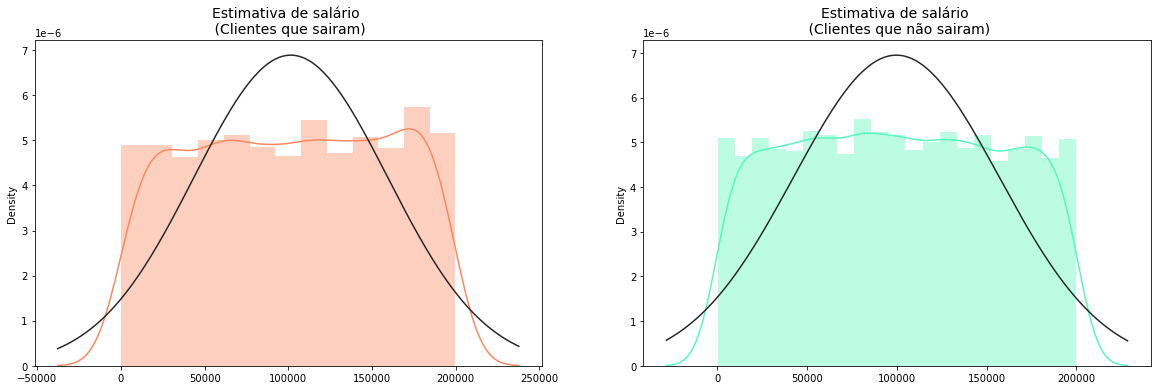

In [109]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

v14_fraud_dist = df['EstimatedSalary'].loc[df['Exited'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Estimativa de salário \n (Clientes que sairam)', fontsize = 14)



v12_fraud_dist = df['EstimatedSalary'].loc[df['Exited'] == 0].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Estimativa de salário \n (Clientes que não sairam)', fontsize = 14)

**Explicação**

Não há nenhuma diferença significativa na estimativa de salário, o que indica que essa feature não interfere na rotatividade de clientes, o que já era esperado.

### 2.4.7 Saldo

Text(0.5, 1.0, 'Saldo \n (Clientes que não sairam)')

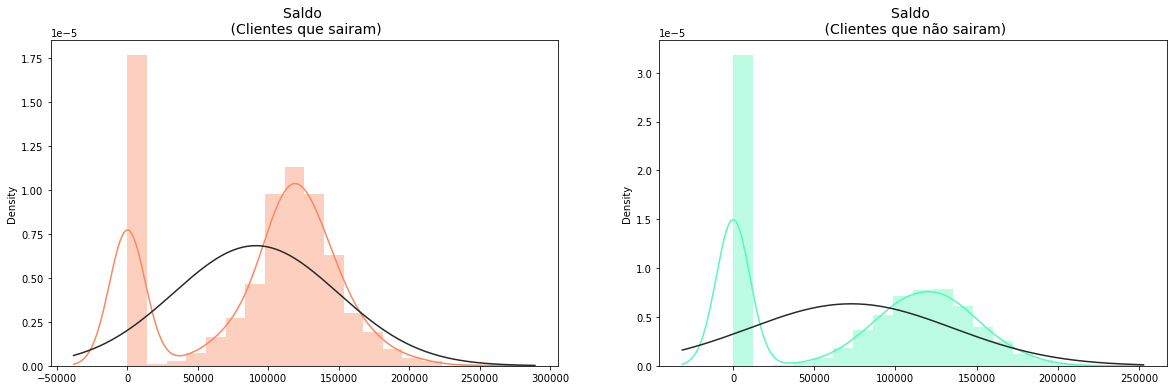

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

v14_fraud_dist = df['Balance'].loc[df['Exited'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Saldo \n (Clientes que sairam)', fontsize = 14)



v12_fraud_dist = df['Balance'].loc[df['Exited'] == 0].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Saldo \n (Clientes que não sairam)', fontsize = 14)

**Explicação**

Há uma importante observação a se fazer. No gráfico acima mostra que a maior densidade de clientes que não tinham saldo permanecem no banco. E os dois gráficos mostram uma distribuição normal.

## 3. Engenharia de características

In [111]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#Classes utilitárias
from helper import *
#from PipelineBuilder import *
import warnings
warnings.filterwarnings("ignore")
import gc
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
#carregando os dados de treinamento

train_labels = df['Exited']

features_train = df.drop(columns = ['Exited'])



### 3.1 Fixar ou removar outliers

In [113]:
num_attribs = nomes_atributos_numericos(features_train)
numeric_features_train = features_train[num_attribs].fillna(0)

def remove_outliers(df_numeric, df):
    for feature in df_numeric.keys():
        # Calcula Q1 (25º percentil dos dados)
        Q1 = np.percentile(df_numeric[feature], 25)
        # Calcula Q3 (75º percentil dos dados) 
        Q3 = np.percentile(df_numeric[feature], 75)
        # Utiliza a amplitude interquartil para calcular o valor discrepante (1,5 vezes a variação interquartil)
        step = (Q3 - Q1) * 1.5
        index = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index
        #atribui nan nas linhas com valores discrepantes
        df.loc[df.index[index], feature] = np.nan

In [114]:
remove_outliers(numeric_features_train, features_train)

**Visualizando dados ausentes**

In [115]:
missing_features = missing_values(features_train)
display(missing_features)
del missing_features

,Total de Ausentes,Percentual de Ausentes
Age,359,3.6
NumOfProducts,60,0.6
CreditScore,15,0.2
Geography,0,0.0
Gender,0,0.0
Tenure,0,0.0
Balance,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


### 3.2 Preencher valores ausentes(com média, zero...) ou removê-los.

**Explicação**

Preencher valores ausentes(com média, zero...) ou removê-los.
Antes de iniciar a criação das features, preciso resolver um problema dectado na análise exploratória e aumentado com a remoção dos outliers, referente ao aumento de quantidade de dados ausentes. Para o classificador não entender que a ausência de dados é um padrão interessante, irei remover as features que apresentarem mais que 50% de dados ausentes. Para as features numéricas que apresentarem menos que 50% de dados ausentes, será imputada a mediana, a fim de evitar problemas provenientes das distorções nas distribuições.

In [116]:
features_train = features_train.loc[:, features_train.isnull().mean() < .5]

display(features_train.head())

print(len(features_train))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


10000


**Explicação**

Como esse é um banco de dados relativamente simples, não ocorreu nenhuma remoção


### 3.3 OneHotEncoder utilizando get_dummies

**Explicação**

Um problema neste conjunto de dados em relação as variáveis categóricas é que os algoritmos de Machine Learning assumirão que dois valores próximos são mais parecidos do que dois valores distantes. Obviamente, este não é o caso. Para corrigir este problema, uma solução comum seria a criação de um atributo binário por categoria e isso é **chamado de one-hot encoding**

In [117]:
#df.ord = df.select_dtypes(include=[object])

features_train = pd.get_dummies(features_train, columns = ['Gender', 'Geography','NumOfProducts','HasCrCard','IsActiveMember'])
print(features_train)

      CreditScore   Age  Tenure    Balance  EstimatedSalary  Gender_Female  \
0           619.0  42.0     2.0       0.00        101348.88              1   
1           608.0  41.0     1.0   83807.86        112542.58              1   
2           502.0  42.0     8.0  159660.80        113931.57              1   
3           699.0  39.0     1.0       0.00         93826.63              1   
4           850.0  43.0     2.0  125510.82         79084.10              1   
...           ...   ...     ...        ...              ...            ...   
9995        771.0  39.0     5.0       0.00         96270.64              0   
9996        516.0  35.0    10.0   57369.61        101699.77              0   
9997        709.0  36.0     7.0       0.00         42085.58              1   
9998        772.0  42.0     3.0   75075.31         92888.52              0   
9999        792.0  28.0     4.0  130142.79         38190.78              1   

      Gender_Male  Geography_France  Geography_Germany  Geograp

### 3.4 Normalização dos dados

**Explicação**

A ideia por trás do StandardScaler é que ele irá transformar seus dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão de 1.
No caso de dados multivariados, isso é feito em termos de recursos (em outras palavras, independentemente para cada coluna dos dados).

Dada a distribuição dos dados, cada valor no conjunto de dados terá o valor médio subtraído e, em seguida, dividido pelo desvio padrão de todo o conjunto de dados (ou recurso no caso multivariado), conforme a equação abaixo.

**Equação:**

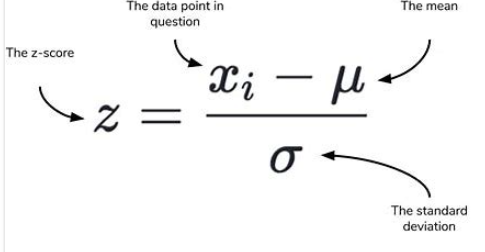

In [118]:
from sklearn.preprocessing import StandardScaler, scale
Scaler = StandardScaler()
db = Scaler.fit_transform(features_train)

db = pd.DataFrame(db, columns=features_train.columns)
features_train = db

features_train.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,-0.332717,0.478068,-1.041760,-1.225848,0.021886,1.095988,-1.095988,0.997204,-0.578736,-0.573809,0.983339,-0.921102,-0.165308,-0.646092,0.646092,-0.970243,0.970243
1,-0.447220,0.364466,-1.387538,0.117350,0.216534,1.095988,-1.095988,-1.002804,-0.578736,1.742740,0.983339,-0.921102,-0.165308,1.547768,-1.547768,-0.970243,0.970243
2,-1.550611,0.478068,1.032908,1.333053,0.240687,1.095988,-1.095988,0.997204,-0.578736,-0.573809,-1.016944,-0.921102,6.049296,-0.646092,0.646092,1.030670,-1.030670
3,0.500032,0.137263,-1.387538,-1.225848,-0.108918,1.095988,-1.095988,0.997204,-0.578736,-0.573809,-1.016944,1.085656,-0.165308,1.547768,-1.547768,1.030670,-1.030670
4,2.071844,0.591670,-1.041760,0.785728,-0.365276,1.095988,-1.095988,-1.002804,-0.578736,1.742740,0.983339,-0.921102,-0.165308,-0.646092,0.646092,-0.970243,0.970243


Algumas variáveis normalizadas

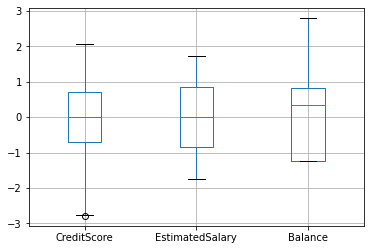

In [119]:
features_train.boxplot(column=['CreditScore','EstimatedSalary', 'Balance'])
plt.show();

### 3.5 Transformação dos dados

**Explicação**

Para não ocorrer problemas posteriores, irei transformar as variáveis abaixo em float.

In [120]:
features_train['Gender_Female'] = features_train['Gender_Female'].values.astype(np.float64)
features_train['Gender_Male'] = features_train['Gender_Male'].values.astype(np.float64)
features_train['Geography_France'] = features_train['Geography_France'].values.astype(np.float64)
features_train['Geography_Germany'] = features_train['Geography_Germany'].values.astype(np.float64)
features_train['Geography_Spain'] = features_train['Geography_Spain'].values.astype(np.float64)
features_train['NumOfProducts_1.0'] = features_train['NumOfProducts_1.0'].values.astype(np.float64)
features_train['NumOfProducts_2.0'] = features_train['NumOfProducts_2.0'].values.astype(np.float64)
features_train['NumOfProducts_3.0'] = features_train['NumOfProducts_3.0'].values.astype(np.float64)
features_train['HasCrCard_0.0'] = features_train['HasCrCard_0.0'].values.astype(np.float64)
features_train['HasCrCard_1.0'] = features_train['HasCrCard_1.0'].values.astype(np.float64)
features_train['IsActiveMember_0.0'] = features_train['IsActiveMember_0.0'].values.astype(np.float64)
features_train['IsActiveMember_1.0'] = features_train['IsActiveMember_1.0'].values.astype(np.float64)                                                

In [121]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         9985 non-null   float64
 1   Age                 9641 non-null   float64
 2   Tenure              10000 non-null  float64
 3   Balance             10000 non-null  float64
 4   EstimatedSalary     10000 non-null  float64
 5   Gender_Female       10000 non-null  float64
 6   Gender_Male         10000 non-null  float64
 7   Geography_France    10000 non-null  float64
 8   Geography_Germany   10000 non-null  float64
 9   Geography_Spain     10000 non-null  float64
 10  NumOfProducts_1.0   10000 non-null  float64
 11  NumOfProducts_2.0   10000 non-null  float64
 12  NumOfProducts_3.0   10000 non-null  float64
 13  HasCrCard_0.0       10000 non-null  float64
 14  HasCrCard_1.0       10000 non-null  float64
 15  IsActiveMember_0.0  10000 non-null  float64
 16  IsAct

### 3.6 Dados de treino/teste

In [122]:
features_train.fillna(-99999, inplace=True)

Separando a variável Target

In [123]:
x = features_train

y = train_labels

### Balancaeamento do conjunto de dados pelo método SMOTE

0    7963
1    7963
Name: Exited, dtype: int64


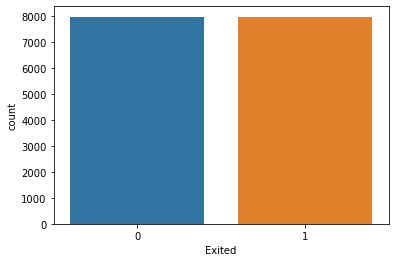

In [124]:
# Balanceamento dos dados
from imblearn.over_sampling import SMOTE
# Definindo parâmetros
smo = SMOTE()
X_resampled, y_resampled = smo.fit_resample(x, y)
# Checar o balanceamento das classes
print(pd.Series(y_resampled).value_counts())
# Plotar a nova distribuição de Classes
sns.countplot(y_resampled);

### Divindindo o conjunto em Treino e Teste.

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled,  test_size = 0.2, random_state = 42)

### 3.7 Redução de dimensionalidade

**Explicação**

A ideia na PCA é combinar múltiplas variáveis preditoras numéricas em um conjunto menor de variáveis, que são combinações lineares ponderadas do conjunto original. O menor conjunto de variáveis, os componentes principais, “explica” a maior parte da variabilidade do conjunto completo de variáveis, reduzindo a dimensão dos dados. Os pesos usados para formar os componentes principais revelam as contribuições relativas das variáveis originais para os novos componentes principais.

In [126]:
from time import time
t0 = time()
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1))
])

n_dimensoes = [2, 4, 8, 10]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_dimensoes
    }
]

grid = GridSearchCV(pipe, cv=5, n_jobs=1, param_grid=param_grid, scoring='roc_auc')
grid.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s


done in 93.101s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


In [127]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])

### 3.7.1Visualizando a acurácia por dimensão

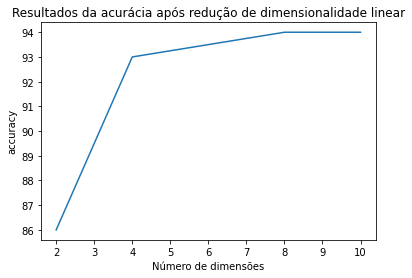

O número de dimensões ideal é 10, com uma accuracy de 94.0%


,Accuracy
Acurácia com 2 dimensões,85.98
Acurácia com 4 dimensões,92.96
Acurácia com 8 dimensões,93.74
Acurácia com 10 dimensões,94.01


In [128]:
plt.figure()
plt.title("Resultados da acurácia após redução de dimensionalidade linear")
plt.xlabel("Número de dimensões")
plt.ylabel("accuracy")
plt.plot(n_dimensoes, np.round(mean_scores, 2) * 100)
plt.show()
pca = grid.best_estimator_.named_steps['reduce_dim']
print('O número de dimensões ideal é {}, com uma accuracy de {}%'.format(len(pca.components_), max(np.round(mean_scores, 3)* 100)))
mean_scores2 = pd.DataFrame(np.round(mean_scores, 4)* 100, columns = ['Accuracy'])
mean_scores2.index = ['Acurácia com {} dimensões'.format(i) for i in n_dimensoes] 
display(mean_scores2)

**Explicação**

Como podemos perceber na visualização acima, o gridSearch identificou que o número ideal de dimensões é 10, conseguindo atingir uma acurácia de 93.81%.

### 3.7.2 Visualizando a variação das dimensões

**Interpretando os componentes principais**

A natureza dos componentes principais geralmente revela informações sobre a estrutura dos dados. Existem algumas visualizações padrões para ajudar a obter conhecimento sobre os componentes principais e vamos utilizar o plot kind bar. 



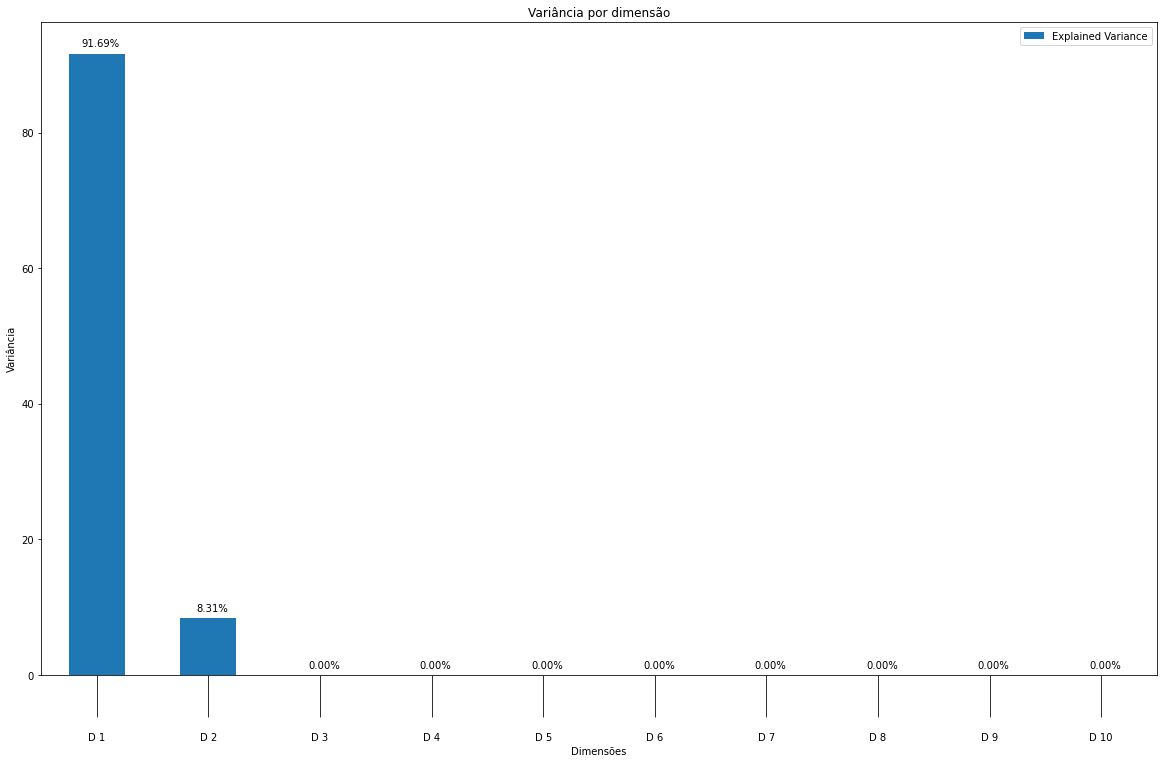

As dimensões juntas apresentam uma variação de 100.00%.


In [129]:
pca = grid.best_estimator_.named_steps['reduce_dim']
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = ['D {}'.format(i) for i in range(1,len(pca.components_)+1)]

# plotando variação das dimensões
(variance_ratios *100).plot(kind="bar", figsize = (20, 12))
ax = plt.gca()
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                        p.get_height()), ha='center',
                va='center', xytext=(4, 10), textcoords='offset points')
ax.tick_params(axis = 'x', which = 'major', pad = 15, size = 42)
ax.set_ylabel('Variância')
ax.set_xlabel('Dimensões')
plt.title("Variância por dimensão")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.show()

print('As dimensões juntas apresentam uma variação de {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_) * 100))

**Explicação**

É normal a variância do primeiro componente principal ser a maior.

### 3.7.3 Visualizando as features em cada dimensão

In [130]:
dfPCA = pd.DataFrame(pca.components_,columns=x_train.columns)
dfPCA

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,0.003862,-9.999925e-01,-1.920622e-07,6.013268e-08,5.258871e-08,8.007280e-08,-8.007280e-08,2.034017e-07,-3.272014e-07,9.301303e-08,-1.583835e-07,6.793318e-10,0.000001,-3.554175e-07,3.554175e-07,-0.000004,0.000004
1,-0.999993,-3.861509e-03,-3.302133e-06,-3.505415e-07,6.523271e-06,1.229980e-06,-1.229980e-06,1.196670e-07,-1.363282e-06,1.230532e-06,4.702515e-06,-5.996330e-06,0.000002,-3.986405e-06,3.986405e-06,0.000005,-0.000005
2,0.000004,-1.460424e-07,1.141185e-02,2.363982e-02,2.864078e-02,2.974735e-01,-2.974735e-01,-1.030992e-01,1.264243e-01,-7.550628e-03,-1.877251e-01,-8.071085e-02,0.832922,-8.207865e-02,8.207865e-02,0.151414,-0.151414
3,-0.000008,2.744029e-06,-1.515212e-02,-3.550455e-01,7.243781e-03,-3.617142e-02,3.617142e-02,2.601279e-01,-3.879360e-01,8.830420e-02,-4.528690e-01,3.865568e-01,0.205159,9.379586e-02,-9.379586e-02,-0.339767,0.339767
4,-0.000006,1.246177e-06,-1.625729e-02,1.917989e-01,8.156557e-03,2.007768e-02,-2.007768e-02,-2.118427e-01,2.445767e-01,-2.563801e-04,7.500597e-02,-1.197972e-01,0.126062,5.948698e-01,-5.948698e-01,-0.238508,0.238508
5,-0.000001,1.116357e-06,3.757528e-04,1.365108e-01,-2.512333e-02,-5.898440e-01,5.898440e-01,-1.790187e-01,1.959672e-01,1.054284e-02,-5.776650e-02,-5.537972e-02,0.358901,-1.609179e-01,1.609179e-01,-0.116912,0.116912
6,0.000003,-3.639111e-06,1.290475e-02,-1.684303e-01,3.318139e-02,-2.449076e-01,2.449076e-01,1.755377e-01,-2.641249e-01,6.193950e-02,-5.486462e-02,2.523880e-02,0.107862,3.208828e-01,-3.208828e-01,0.512240,-0.512240
7,-0.000004,-1.470342e-06,1.549264e-02,-7.445671e-03,-1.174161e-02,2.864432e-02,-2.864432e-02,-5.200273e-01,3.279170e-01,2.730062e-01,-4.306197e-01,5.064184e-01,-0.235011,5.891037e-03,-5.891037e-03,0.155311,-0.155311
8,0.000004,5.908280e-07,-6.054873e-02,-1.486608e-01,5.513153e-03,1.981017e-02,-1.981017e-02,-3.453895e-01,-3.609259e-01,7.625306e-01,2.492413e-01,-2.608322e-01,0.054588,-3.570799e-02,3.570799e-02,-0.057964,0.057964
9,-0.000002,-9.003087e-08,-7.640172e-01,-1.430595e-02,-6.419239e-01,8.819366e-03,-8.819366e-03,1.520571e-02,1.597546e-02,-3.365641e-02,-1.175721e-02,9.744808e-03,0.014981,7.116881e-03,-7.116881e-03,0.028922,-0.028922


###  3.7.4 Obtendo o nome das 3 features com maior variância nas 2 primeiras dimensões

In [131]:

top_n = 3

dfPCA = dfPCA[:2]
a = pd.DataFrame({n: dfPCA.T[col].nlargest(top_n).index.tolist() 
                  for n, col in enumerate(dfPCA.T)}).T
#Obtendo o nome das 3 features com menor variância nas 2 primeiras dimensões
dfPCA = dfPCA[:2]
b = pd.DataFrame({n: dfPCA.T[col].nsmallest(top_n).index.tolist() 
                  for n, col in enumerate(dfPCA.T)}).T
#criando um dataframe com o nome das features selecionadas
c = a.join(b, how='outer', lsuffix='maiores', rsuffix='menores')
c

,0maiores,1maiores,2maiores,0menores,1menores,2menores
0,CreditScore,IsActiveMember_1.0,NumOfProducts_3.0,Age,IsActiveMember_0.0,HasCrCard_0.0
1,EstimatedSalary,IsActiveMember_0.0,NumOfProducts_1.0,CreditScore,Age,NumOfProducts_2.0


### 3.7.5 Visualizando os Resultados

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


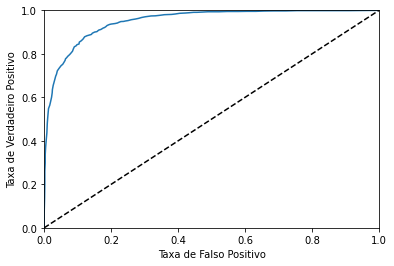

Score Roc: 95.0%


In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_probas = grid.best_estimator_.predict_proba(x_test)
y_scores = y_probas[:, 1] 

fpr1, tpr1, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr1, tpr1, linewidth=1.5, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.show()

print("Score Roc: {}%".format(np.round(roc_auc_score(y_test, y_scores)*100), 2))

**Explicação**

Após a engenharia de caractéristicas, consegui manter um score de 94%, isso já um grande avanço.e não utilizei outros modelos para classificar o conjunto de dados, isso que será o próximo passo do projeto.

### Salvando classificador do PCA

In [133]:
with open('classifier_pca.pkl', "wb") as clf_outfile:
    pickle.dump(grid, clf_outfile)

### Carregando classificador

In [134]:
with open('classifier_pca.pkl', "rb") as clf_infile:
    clf = pickle.load(clf_infile)

## 4. Modelação

In [135]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from helper import *
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly as py
from plotly import tools
init_notebook_mode(connected=True)
# ================================================== #
#               Classifiers                          #
# ================================================== #
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
# ================================================== #
#               Validation and Test                  #
# ================================================== #
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# ===================================================#
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from time import time
import warnings
warnings.filterwarnings("ignore")
path = "plots/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Tempo de execução RandomForestClassifier: 3.921 s
Train Accuracy: 1.0%
Train Score Roc: 100.0%
Train CV Score : Mean - 0.9504365 | Std - 0.003183885 | Min - 0.9453051 | Max - 0.9537453
------------------------------------------------------------------------------------------------
Test Accuracy: 0.8967357187696171%
Test Score Roc: 96.073%
Test CV Score : Mean - 0.9105585 | Std - 0.009940708 | Min - 0.8933018 | Max - 0.9239047


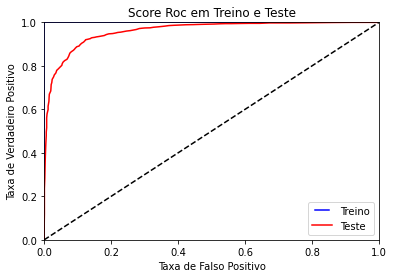

In [136]:
classifier = RandomForestClassifier()
t0 = time()
classifier.fit(x_train, y_train)
print("Tempo de execução RandomForestClassifier:", round(time()-t0, 3), "s")
draw_roc_score(classifier, x_train, y_train, x_test, y_test)

Tempo de execução Gradient Boosting: 6.283 s
Train Accuracy: 0.878414442700157%
Train Score Roc: 95.0%
Train CV Score : Mean - 0.9444555 | Std - 0.002860373 | Min - 0.9391295 | Max - 0.9468525
------------------------------------------------------------------------------------------------
Test Accuracy: 0.8688010043942247%
Test Score Roc: 94.67%
Test CV Score : Mean - 0.9335449 | Std - 0.01217086 | Min - 0.9150044 | Max - 0.9457815


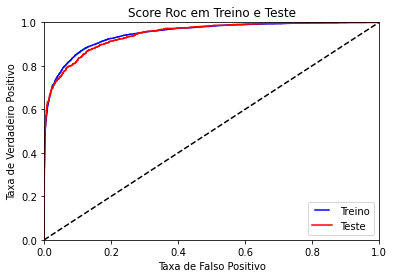

In [137]:
t0 = time()
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print("Tempo de execução Gradient Boosting:", round(time()-t0, 3), "s")
draw_roc_score(gb, x_train, y_train, x_test, y_test)

Tempo de execução Adaboost: 1.657 s
Train Accuracy: 0.8149136577708006%
Train Score Roc: 89.543%
Train CV Score : Mean - 0.8912645 | Std - 0.004312549 | Min - 0.8840181 | Max - 0.8972922
------------------------------------------------------------------------------------------------
Test Accuracy: 0.8088512241054614%
Test Score Roc: 89.959%
Test CV Score : Mean - 0.8949274 | Std - 0.01199208 | Min - 0.8778781 | Max - 0.9071162


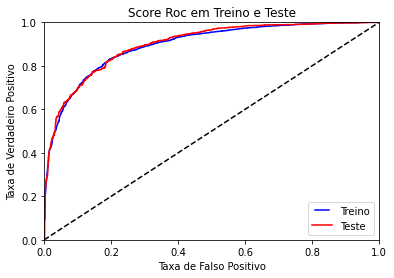

In [138]:
classifier = AdaBoostClassifier()
t0 = time()
classifier.fit(x_train, y_train)
print("Tempo de execução Adaboost:", round(time()-t0, 3), "s")
draw_roc_score(classifier, x_train, y_train, x_test, y_test)

### Modelo Selecionado
Como pudemos ver na seção anterior, o Gradient Boosting obteve o melhor desempenho utilizando uma instância padrão do classificador, ou seja, sem realizar qualquer ajuste nos seus hiperparâmetros. 



## Conclusão

Esse trabalho foi desenvolvido para explicar o passo a passo de um modelo de Machine Learning. Faltaram algumas etapas, que serão discutidas em outros projetos.

Espero que tenham gostado.